## 巡回セールスマン問題

In [1]:
##################### Packages #####################
import numpy as np
import pulp as pp
import time
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt
import networkx as nx
import os

In [2]:
##################### generate distance matrix #####################
# Input
    # min_p: the minimum value of random value
    # max_p: the maximum value of random value
    # num: the number of points
# Output
    # M: the coordinate of the points
    # dist_M: the distance matrix
def dist_matrix(min_p, max_p, num):
    # generate uniform variable in range [min_p, max_p), num \times 2 list
    M = (max_p - min_p) * np.random.random_sample((num, 2)) + min_p
    dist_M = distance.cdist(M, M, metric = 'euclidean')
    return M, dist_M
##########################################################################

In [3]:
##################### generate and solve TSP problem #####################
## Input
    # minp: the minimum value of random value
    # maxp: the maximum value of random value
    # n_city: the number of city
## Output
    # Cord_list: the coordinate of the cities
    # X_lst: the list of solution x value
        # X_lst[u][v] <- x[u][v]
    # Y_lst: the list of solution y value
        # Y_lst[v] <- y[v]
def TSP_problem(minp, maxp, n_city):
    ## information of cities
    V = list(range(n_city))             # the set of cities
    s = 0                               # the starting point
    # coordinate and distance matrix
    Cord_list, dist_mat = dist_matrix(minp, maxp, n_city)
    
    ## define the Problem
    problem = pp.LpProblem(name = 'TSP', sense = pp.LpMinimize)
    
    ## define variables
    x = [[pp.LpVariable("x(%s,%s)"%(u, v), cat="Binary") for u in V] for v in V]
    y = [pp.LpVariable("y(%s)"%(s), cat="Integer", lowBound=0.0, upBound=0.0)]
    for v in list(set(V) - {s}):
        y.append(pp.LpVariable("y(%s)"%(v), cat="Integer", lowBound=1.0, upBound = n_city - 1))
    
    ## objective function
    objective = pp.lpSum(dist_mat[u, v] * x[u][v] for u in V for v in V if u != v)
    problem += objective

    ## constraints
    # constraint (1)
    for v in V:
        problem += pp.lpSum(x[u][v] for u in V if u != v) == 1
    # constraint (2)
    for v in V:
        problem += pp.lpSum(x[v][u] for u in V if u != v) == 1
    # constraint (3) MTZ constraints
    for u in list(set(V) - {s}):
        for v in list(set(V) - {s}):
            if u != v:
                problem += y[u] + 1.0 - n_city * (1.0 - x[u][v]) <= y[v]
    # constraint (4)
    for v in V:
        problem += x[v][v] == 0 
    # constraint (5)
    problem += y[s] == 0

    time_begin = time.time()
    ## execute problem
    status = problem.solve()

    time_end = time.time()
    time_solve = time_end - time_begin
    print("time to solve: %f" % time_solve)

    # status
    #print("Status: {}".format(pp.LpStatus[status]))
    #print("Optimal Value [a.u.]: {}".format(objective.value()))

    ## Output
    # the list of x value
    X_lst = []
    for u in V:
        ulst = []
        for v in V:
            ulst.append(x[u][v].value())
        X_lst.append(ulst)
    # the list of y value
    Y_lst = []
    for v in V:
        Y_lst.append(y[v].value())
    print("the list of y value:")
    print(Y_lst)
    # Objective value
    obj_val = objective.value()
    print("objective value: %f" % obj_val)
    return Cord_list, X_lst, Y_lst, obj_val, time_solve
###############################################################################

In [4]:
##################### Plot Route #####################
## Input:
    # C_list: City list
    # n_city: the number of the cities
    # x_sol: the solution of x value
    # n: the number of roop
def Plot_TSP(C_list, n_city, x_sol, n):
    V = list(range(n_city))             # the set of cities
    G = nx.DiGraph()                    # define graph
    G.add_nodes_from(V)                 # node
    for u in V:
        for v in V:
            if x_sol[u][v] == 1.0:
                G.add_edge(u, v)
    ## location
    pos={}
    for v in V:
        pos[v] = (C_list[v][0], C_list[v][1])
    ## save figure
    fig = plt.figure(figsize = (10, 7.5))
    ax = fig.add_subplot(1, 1, 1)
    nx.draw_networkx(G, pos, ax=ax)
    nx.draw_networkx_edges(G, pos, label=1, edge_color="black", width=2)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xlabel('X axis', fontsize = 15)
    ax.set_ylabel('Y axis', fontsize = 15)
    ax.set_title('TSP solution')
    ax.grid(True)
    plt.show()
###############################################################################

time to solve: 0.789449
the list of y value:
[0.0, 2.0, 8.0, 5.0, 9.0, 6.0, 11.0, 1.0, 13.0, 14.0, 12.0, 3.0, 10.0, 4.0, 7.0]
objective value: 36.401894


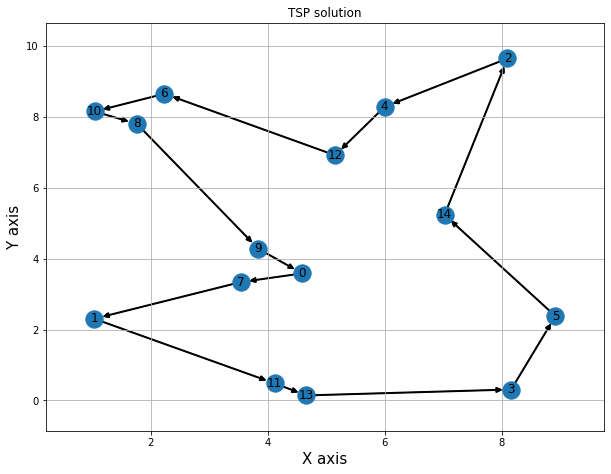

In [5]:
##################### Execute #####################
num_city = 15               # the number of cities
City_list, solX, solY, obj_v, t_solve = TSP_problem(0, 10, num_city)
# plot
Plot_TSP(City_list, num_city, solX, 0)